<a href="https://colab.research.google.com/github/klabuttt/Pemprosesan-Teks/blob/main/CPMK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING DATASET

In [1]:
import re
import pandas as pd
data = pd.read_csv("capcut_reviews.csv")

In [2]:
jumlah_ulasan, jumlah_kolom = data.shape
print(f"Jumlah Ulasan yang berhasil dikumpulkan: {jumlah_ulasan}")
print(f"Jumlah Kolom yang berhasil dikumpulkan: {jumlah_kolom}")

data.head(5)

Jumlah Ulasan yang berhasil dikumpulkan: 1996
Jumlah Kolom yang berhasil dikumpulkan: 2


,Rating,Komentar
0,1,parah pake text otomatis saja prabayar jgn di ...
1,3,knp aplikasinya hang trs pdhl baru aja di-upda...
2,5,saya senang
3,1,ya smua aja di premium capcut mo naik haji apa...
4,5,bagus tapi tolong kurangi iklan nya


WORDCLOUD SEBELUM PROCESSING

---



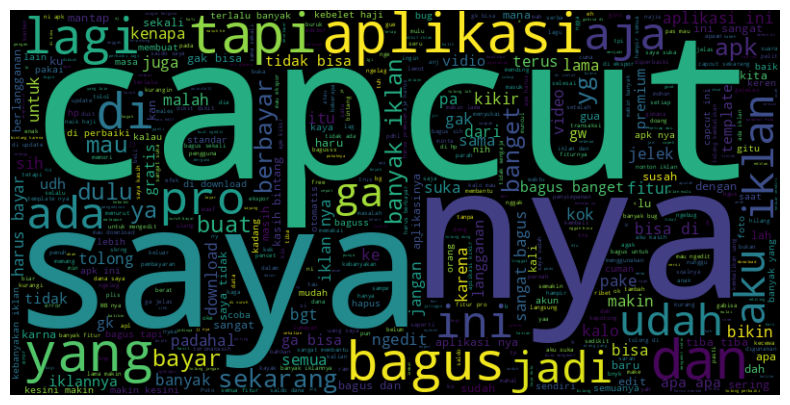

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# # Mengisi nilai NaN dengan string kosong ('')
# data['Komentar'] = data['Komentar'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(data['Komentar'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


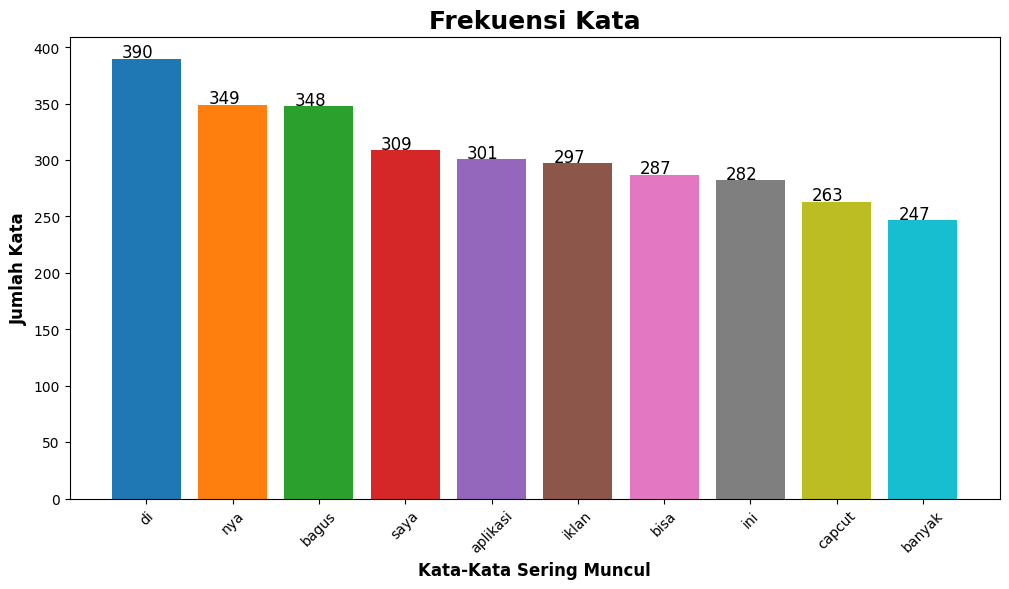

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["Komentar"])

tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Mendefinisikan palette warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka di tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()


# PREPROCESSING

In [5]:
!pip install nltk

In [6]:

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.0 MB/s eta 0:00:00


In [79]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Membaca dataset
reviews_data = pd.read_csv('capcut_reviews.csv')

# Inisialisasi objek Stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 1. Clean Text: Menghapus karakter selain huruf dan spasi
def clean_text(text):
    # Memperbolehkan huruf kapital, huruf kecil, dan spasi
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Menghapus karakter selain huruf dan spasi
    return text

# 2. Case Folding: Mengubah semua teks menjadi huruf kecil
def case_folding(text):
    return text.lower()

# 3. Tokenisasi: Memecah teks menjadi kata-kata
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# 4. Menghapus Stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian'))  # Menggunakan stopwords Bahasa Indonesia
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# 5. Stemming: Mengubah kata-kata ke bentuk dasar
def stemming_text(tokens):
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)  # Gabungkan kata-kata yang sudah di-stem

# Menyimpan hasil per tahap dalam kolom terpisah
reviews_data['Review'] = reviews_data['Komentar']
reviews_data['text_clean'] = reviews_data['Komentar'].apply(clean_text)
reviews_data['text_CaseFolding'] = reviews_data['text_clean'].apply(case_folding)
reviews_data['text_Tokenized'] = reviews_data['text_CaseFolding'].apply(tokenize_text)
reviews_data['text_Stopwords'] = reviews_data['text_Tokenized'].apply(remove_stopwords)
reviews_data['text_Stemmed'] = reviews_data['text_Stopwords'].apply(stemming_text)

# # Menyimpan data ke file CSV dengan hasil preprocessing
# reviews_data.to_csv('Ulasan_CapCut.csv', index=False, encoding='utf-8')

# Menampilkan beberapa baris pertama untuk memverifikasi hasil
display(reviews_data[[ 'text_clean', 'text_CaseFolding', 'text_Tokenized', 'text_Stopwords', 'text_Stemmed']].head(5))

,text_clean,text_CaseFolding,text_Tokenized,text_Stopwords,text_Stemmed
0,parah pake text otomatis saja prabayar jgn di ...,parah pake text otomatis saja prabayar jgn di ...,"[parah, pake, text, otomatis, saja, prabayar, ...","[parah, pake, text, otomatis, prabayar, jgn, d...",parah pake text otomatis prabayar jgn donlod a...
1,knp aplikasinya hang trs pdhl baru aja diupdat...,knp aplikasinya hang trs pdhl baru aja diupdat...,"[knp, aplikasinya, hang, trs, pdhl, baru, aja,...","[knp, aplikasinya, hang, trs, pdhl, aja, diupd...",knp aplikasi hang trs pdhl aja diupdatedl apli...
2,saya senang,saya senang,"[saya, senang]",[senang],senang
3,ya smua aja di premium capcut mo naik haji apa...,ya smua aja di premium capcut mo naik haji apa...,"[ya, smua, aja, di, premium, capcut, mo, naik,...","[ya, smua, aja, premium, capcut, mo, haji, gmn...",ya smua aja premium capcut mo haji gmn dah
4,bagus tapi tolong kurangi iklan nya,bagus tapi tolong kurangi iklan nya,"[bagus, tapi, tolong, kurangi, iklan, nya]","[bagus, tolong, kurangi, iklan, nya]",bagus tolong kurang iklan nya


In [8]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
import pandas as pd
import re

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []
    replaced_text = ''

    if isinstance(text, str):
        # Remove explicit characters first (if that's the intention)
        text = re.sub(r'\b(?:anjritt|kata_kasar_lainnya)\b', '', text, flags=re.IGNORECASE)

        words = text.split()
        replaced_words = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    # Assuming kata_tidak_baku_hash is meant to store the original taboo word
                    kata_tidak_baku_hash.append(word)
                else:
                    # Handle cases where baku_word is not a string (e.g., NaN in kamus)
                    replaced_words.append(word) # Keep the original word
            else:
                replaced_words.append(word)
                kalimat_baku.append(word) # Add the original word to kalimat_baku if not replaced

        replaced_text = ' '.join(replaced_words)

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [56]:
data = pd.read_csv('Ulasan_CapCut.csv')
data.head(5)

,Rating,Komentar,Review,text_clean,text_CaseFolding,text_Tokenized,text_Stopwords,text_Stemmed
0,1,parah pake text otomatis saja prabayar jgn di ...,parah pake text otomatis saja prabayar jgn di ...,parah pake text otomatis saja prabayar jgn di ...,parah pake text otomatis saja prabayar jgn di ...,"['parah', 'pake', 'text', 'otomatis', 'saja', ...","['parah', 'pake', 'text', 'otomatis', 'prabaya...",parah pake text otomatis prabayar jgn donlod a...
1,3,knp aplikasinya hang trs pdhl baru aja di-upda...,knp aplikasinya hang trs pdhl baru aja di-upda...,knp aplikasinya hang trs pdhl baru aja diupdat...,knp aplikasinya hang trs pdhl baru aja diupdat...,"['knp', 'aplikasinya', 'hang', 'trs', 'pdhl', ...","['knp', 'aplikasinya', 'hang', 'trs', 'pdhl', ...",knp aplikasi hang trs pdhl aja diupdatedl apli...
2,5,saya senang,saya senang,saya senang,saya senang,"['saya', 'senang']",['senang'],senang
3,1,ya smua aja di premium capcut mo naik haji apa...,ya smua aja di premium capcut mo naik haji apa...,ya smua aja di premium capcut mo naik haji apa...,ya smua aja di premium capcut mo naik haji apa...,"['ya', 'smua', 'aja', 'di', 'premium', 'capcut...","['ya', 'smua', 'aja', 'premium', 'capcut', 'mo...",ya smua aja premium capcut mo haji gmn dah
4,5,bagus tapi tolong kurangi iklan nya,bagus tapi tolong kurangi iklan nya,bagus tapi tolong kurangi iklan nya,bagus tapi tolong kurangi iklan nya,"['bagus', 'tapi', 'tolong', 'kurangi', 'iklan'...","['bagus', 'tolong', 'kurangi', 'iklan', 'nya']",bagus tolong kurang iklan nya


In [57]:
import pandas as pd

# Baca kamus kata tidak baku dari file Excel
kamus_data = pd.read_excel("kamuskatabaku.xlsx")

# Mengonversi dua kolom menjadi dictionary
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [58]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['text_CaseFolding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# Menampilkan hasil
# data.head(120)

df = pd.DataFrame(data[['Komentar', 'text_clean', 'text_CaseFolding', 'normalisasi']])

reviews_data.to_csv('Normalisasi_Ulasan.csv', index=False, encoding='utf-8')
display(df.head(10))

,Komentar,text_clean,text_CaseFolding,normalisasi
0,parah pake text otomatis saja prabayar jgn di ...,parah pake text otomatis saja prabayar jgn di ...,parah pake text otomatis saja prabayar jgn di ...,parah pakai text otomatis saja prabayar jangan...
1,knp aplikasinya hang trs pdhl baru aja di-upda...,knp aplikasinya hang trs pdhl baru aja diupdat...,knp aplikasinya hang trs pdhl baru aja diupdat...,kenapa aplikasinya hang terus padahal baru saj...
2,saya senang,saya senang,saya senang,saya senang
3,ya smua aja di premium capcut mo naik haji apa...,ya smua aja di premium capcut mo naik haji apa...,ya smua aja di premium capcut mo naik haji apa...,ya semua saja di premium capcut mau naik haji ...
4,bagus tapi tolong kurangi iklan nya,bagus tapi tolong kurangi iklan nya,bagus tapi tolong kurangi iklan nya,bagus tapi tolong kurangi iklan ya
5,"aplikasi ga guna, apa apa berbayar giliran uda...",aplikasi ga guna apa apa berbayar giliran udah...,aplikasi ga guna apa apa berbayar giliran udah...,aplikasi tidak guna apa apa berbayar giliran s...
6,transaksi ghaib,transaksi ghaib,transaksi ghaib,transaksi ghaib
7,"ni apk makin kesini makin gak ngotak njir, sar...",ni apk makin kesini makin gak ngotak njir sara...,ni apk makin kesini makin gak ngotak njir sara...,nih aplikasi makin kesini makin tidak ngotak a...
8,udah bayar masih disiruh bayar lagi,udah bayar masih disiruh bayar lagi,udah bayar masih disiruh bayar lagi,sudah bayar masih disiruh bayar lagi
9,terlalu babnyak iklan dan ga bisa di skip,terlalu babnyak iklan dan ga bisa di skip,terlalu babnyak iklan dan ga bisa di skip,terlalu babnyak iklan dan tidak bisa di skip


In [64]:
import nltk
from nltk.util import bigrams
from nltk.corpus import stopwords

# Mengambil kalimat contoh dari DataFrame df
sentence = df['normalisasi'][0]

# Tokenisasi kalimat
words = nltk.word_tokenize(sentence)

# Membuat bigram
bigram = list(bigrams(words))

print(bigram)

[('parah', 'pakai'), ('pakai', 'text'), ('text', 'otomatis'), ('otomatis', 'saja'), ('saja', 'prabayar'), ('prabayar', 'jangan'), ('jangan', 'di'), ('di', 'download'), ('download', 'anjritttt')]


In [68]:
import nltk
from nltk.util import bigrams
from nltk.corpus import stopwords
from collections import Counter

# Tokenisasi pada kolom 'text_Stemmed'
# Ensure the input to word_tokenize is a string
reviews_data['text_Stemmed_tokens'] = reviews_data['text_Stemmed'].apply(lambda x: nltk.word_tokenize(str(x).lower()))

# Membuat Bigram dari token yang telah dibersihkan
reviews_data['bigrams'] = reviews_data['text_Stemmed_tokens'].apply(lambda x: list(bigrams(x)))

# Menggabungkan semua bigram dari seluruh dataset
all_bigrams = [bigram for bigram_list in reviews_data['bigrams'] for bigram in bigram_list]

# Menghitung frekuensi bigram
bigram_freq = Counter(all_bigrams)

# Menampilkan Bigram yang paling sering muncul
print("Bigram yang paling sering muncul:")
display(bigram_freq.most_common(10))  # Menampilkan 10 bigram paling sering

Bigram yang paling sering muncul:


[(('bagus', 'banget'), 49),
 (('iklan', 'nya'), 46),
 (('aplikasi', 'nya'), 42),
 (('kasih', 'bintang'), 32),
 (('kebelet', 'haji'), 31),
 (('banyak', 'iklan'), 30),
 (('apk', 'nya'), 29),
 (('aplikasi', 'bagus'), 26),
 (('tolong', 'baik'), 25),
 (('nya', 'bagus'), 24)]

In [69]:
# Filter bigram untuk menghapus yang tidak bermakna (misalnya berdasarkan analisis sebelumnya)
bigrams_to_remove = [('kebelet', 'haji'), ('tolong', 'baik')]  # Bigram yang akan dihapus

# Menghapus bigram yang tidak bermakna
filtered_bigrams = [bigram for bigram in all_bigrams if bigram not in bigrams_to_remove]

# Menghitung frekuensi bigram setelah dihapus yang tidak bermakna
filtered_bigram_freq = Counter(filtered_bigrams)

# Menampilkan Bigram yang paling sering setelah dihapus
print("Bigram setelah dihapus yang tidak bermakna:")
display(filtered_bigram_freq.most_common(10))  # Menampilkan 10 bigram paling sering setelah filter

Bigram setelah dihapus yang tidak bermakna:


[(('bagus', 'banget'), 49),
 (('iklan', 'nya'), 46),
 (('aplikasi', 'nya'), 42),
 (('kasih', 'bintang'), 32),
 (('banyak', 'iklan'), 30),
 (('apk', 'nya'), 29),
 (('aplikasi', 'bagus'), 26),
 (('nya', 'bagus'), 24),
 (('nonton', 'iklan'), 21),
 (('fitur', 'pro'), 19)]

In [73]:
import pandas as pd
from collections import Counter
import re

reviews_data = pd.read_csv("Normalisasi_Ulasan.csv")

# Tokenisasi menggunakan regex untuk memisahkan kata-kata
def tokenize(text):
    # Ensure the input is treated as a string before applying lower()
    return re.findall(r'\b\w+\b', str(text).lower())

# Fungsi untuk membuat N-Gram (1-3)
def generate_ngrams(text, n):
    tokens = tokenize(text)
    return list(zip(*[tokens[i:] for i in range(n)]))  # Membuat N-Gram

# Membuat Unigrams (1-Gram), Bigrams (2-Grams), dan Trigrams (3-Grams)
reviews_data['unigrams'] = reviews_data['text_Stemmed'].apply(lambda x: generate_ngrams(x, 1))
reviews_data['bigrams'] = reviews_data['text_Stemmed'].apply(lambda x: generate_ngrams(x, 2))
reviews_data['trigrams'] = reviews_data['text_Stemmed'].apply(lambda x: generate_ngrams(x, 3))

# Menggabungkan semua N-Gram dari seluruh dataset
all_unigrams = [unigram for unigram_list in reviews_data['unigrams'] for unigram in unigram_list]
all_bigrams = [bigram for bigram_list in reviews_data['bigrams'] for bigram in bigram_list]
all_trigrams = [trigram for trigram_list in reviews_data['trigrams'] for trigram in trigram_list]

# Menghitung frekuensi untuk setiap N-Gram
unigram_freq = Counter(all_unigrams)
bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Menampilkan hasil N-Gram yang paling sering muncul
print("Unigrams (1-Grams) - Most Common:")
print(unigram_freq.most_common(10))  # Menampilkan 10 unigrams paling sering

print("\nBigrams (2-Grams) - Most Common:")
print(bigram_freq.most_common(10))  # Menampilkan 10 bigrams paling sering

print("\nTrigrams (3-Grams) - Most Common:")
print(trigram_freq.most_common(10))  # Menampilkan 10 trigrams paling sering

Unigrams (1-Grams) - Most Common:
[(('iklan',), 421), (('bagus',), 400), (('nya',), 385), (('aplikasi',), 371), (('capcut',), 328), (('bayar',), 307), (('apk',), 183), (('ga',), 175), (('pro',), 158), (('tolong',), 155)]

Bigrams (2-Grams) - Most Common:
[(('bagus', 'banget'), 49), (('iklan', 'nya'), 46), (('aplikasi', 'nya'), 42), (('kasih', 'bintang'), 32), (('kebelet', 'haji'), 31), (('banyak', 'iklan'), 30), (('apk', 'nya'), 29), (('aplikasi', 'bagus'), 26), (('tolong', 'baik'), 25), (('nya', 'bagus'), 24)]

Trigrams (3-Grams) - Most Common:
[(('aplikasi', 'nya', 'bagus'), 10), (('fitur', 'pro', 'nya'), 8), (('tolong', 'kembali', 'uang'), 7), (('s', 's', 's'), 7), (('apk', 'nya', 'bagus'), 6), (('mohon', 'kembali', 'uang'), 6), (('dikit', 'dikit', 'iklan'), 6), (('golong', 'famili', 'cerambycidae'), 6), (('famili', 'cerambycidae', 'kumbang'), 6), (('cerambycidae', 'kumbang', 'tanduk'), 6)]


WORCLOUD SETELAG PREPROCESSING

---



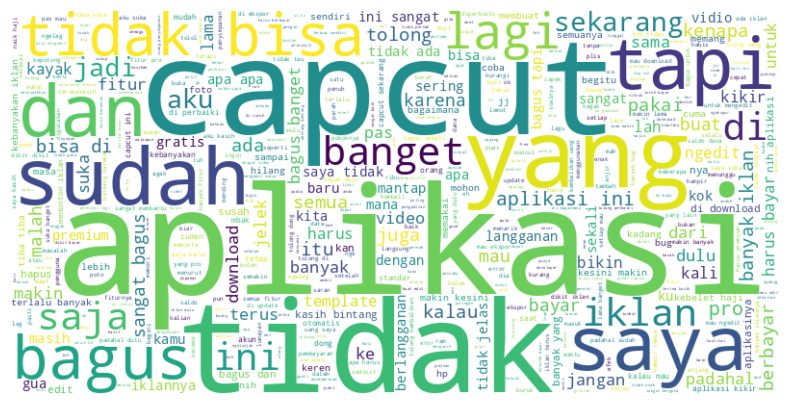

In [76]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'stemming_data'
text = ' '.join(df['normalisasi'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'sih'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
